[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [170]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [171]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [172]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [173]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

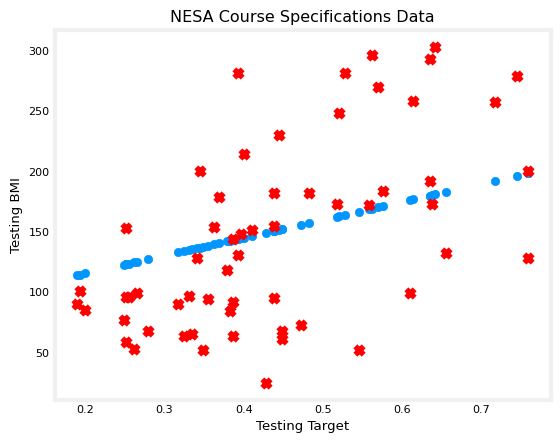

In [174]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [175]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.24999084909258817


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [176]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

         DoB    DoT  Predicted result    Loss
0   0.613793  258.0        176.761807   81.24
1   0.393103  281.0        144.072623  136.93
2   0.265517   99.0        125.174189  -26.17
3   0.568966  270.0        170.121817   99.88
4   0.248276   77.0        122.620347  -45.62
5   0.448276   61.0        152.244919  -91.24
6   0.544828   52.0        166.546437 -114.55
7   0.400000  214.0        145.094160   68.91
8   0.193103  101.0        114.448051  -13.45
9   0.758621  200.0        198.214084    1.79
10  0.396552  148.0        144.583392    3.42
11  0.575862  184.0        171.143354   12.86
12  0.251724   59.0        123.131115  -64.13
13  0.562069  296.0        169.100280  126.90
14  0.520690  248.0        162.971058   85.03
15  0.482759  182.0        157.352604   24.65
16  0.255172   96.0        123.641884  -27.64
17  0.744828  279.0        196.171010   82.83
18  0.758621  128.0        198.214084  -70.21
19  0.251724  153.0        123.131115   29.87
20  0.637931  173.0        180.337

You may want to do some manual predictions to understand your model.

In [177]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[100.65730136]
[233.96787852]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [178]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 85.84501500986686
Coefficient: [148.12286351]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [179]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [180]:
# Optional
filename = 'my_saved_model_v3.sav'
model_D = pickle.load(open(filename, 'rb'))

In [181]:
mx_col = ['BMI','BP','BGU', 'CombRisk']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

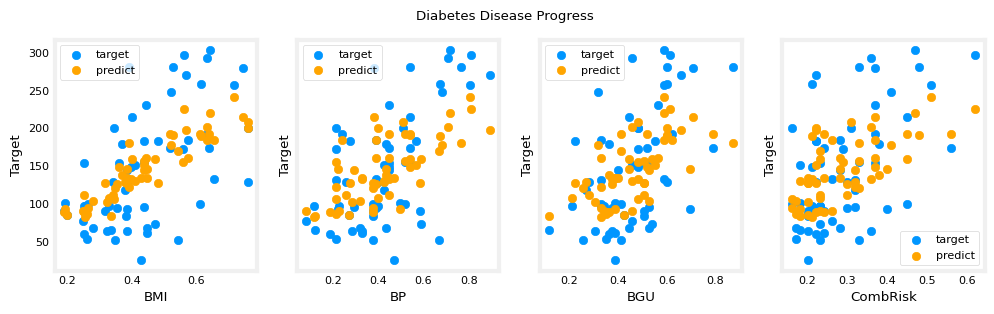

In [182]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [183]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.49149182134319025


In [184]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.